In [26]:
import h5py

file = h5py.File('dataset.h5', 'r')
#label_dict = {"['n']": 0, "['c']": 1, "['h']": 2, "['s']": 3,
 #             "['a']": 4, "['f']": 5, "['d']": 6, "['su']": 7}
#label_dict = {"[b'n']": 0, "[b'c']": 1, "[b'h']": 2, "[b'sa']": 3,
              #"[b'a']": 4, "[b'f']": 5, "[b'd']": 6, "[b'su']": 7}

In [27]:
X, y = file['mfcc'][:10000], file['label'][:10000]
#X_test, y_test = file['mfcc'][], file['label'][]
file['mfcc'].shape

(36406, 12, 42)

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [29]:
#y = y.astype(str)

#y = np.array([label_dict[str(e)] for e in y])

y.shape

(10000, 1)

In [30]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import optimizers

model = Sequential()

model.add(Conv1D(128, 5,padding='same',
                 input_shape=(12,42)))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(8))
model.add(Activation('softmax'))
opt = tf.keras.optimizers.RMSprop(learning_rate=0.00005, rho=0.9, epsilon=None, decay=0.0)

In [31]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 12, 128)           27008     
                                                                 
 activation_9 (Activation)   (None, 12, 128)           0         
                                                                 
 dropout_4 (Dropout)         (None, 12, 128)           0         
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 1, 128)           0         
 1D)                                                             
                                                                 
 conv1d_7 (Conv1D)           (None, 1, 128)            82048     
                                                                 
 activation_10 (Activation)  (None, 1, 128)            0         
                                                      

In [32]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [ ]:
cnnhistory=model.fit(X_train, y_train, batch_size=16, epochs=500,validation_data=(X_test, y_test))

Epoch 1/500
419/419 [==============================] - 2s 5ms/step - loss: 1.1097 - accuracy: 0.5870 - val_loss: 1.3004 - val_accuracy: 0.5370
Epoch 2/500
419/419 [==============================] - 2s 5ms/step - loss: 1.1113 - accuracy: 0.5854 - val_loss: 1.2857 - val_accuracy: 0.5467
Epoch 3/500
419/419 [==============================] - 2s 5ms/step - loss: 1.1032 - accuracy: 0.5890 - val_loss: 1.3006 - val_accuracy: 0.5394
Epoch 4/500
419/419 [==============================] - 2s 4ms/step - loss: 1.1160 - accuracy: 0.5860 - val_loss: 1.2989 - val_accuracy: 0.5297
Epoch 5/500
419/419 [==============================] - 2s 5ms/step - loss: 1.0929 - accuracy: 0.5843 - val_loss: 1.2590 - val_accuracy: 0.5464
Epoch 6/500
419/419 [==============================] - 2s 5ms/step - loss: 1.0958 - accuracy: 0.5869 - val_loss: 1.3098 - val_accuracy: 0.5442
Epoch 7/500
419/419 [==============================] - 2s 5ms/step - loss: 1.0859 - accuracy: 0.5884 - val_loss: 1.2711 - val_accuracy: 0.5394

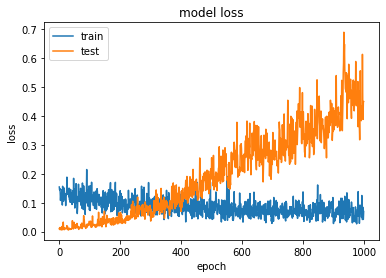

In [12]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
plt.plot(cnnhistory.history['acc'])
plt.plot(cnnhistory.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()